In [2]:
import pandas as pd
import matplotlib.pyplot as plt
path = '^GSPC (2).csv'  #whatever your yahoo finance file is

df = pd.read_csv(path,index_col = 0)['Adj Close']

df.index = pd.to_datetime(df.index) #price series
ret = df.pct_change().dropna() #return series

In [3]:
recession_list =[
1929,1937,1949,1953,1958,1960,1969,1980,1990,2000,2008,2020]


''' i treat the minimum index level date as the bottom of each ression '''

bottom = []
peak = []
drops = []
back = []
duration = []
rebounce = []
for recession in recession_list:
    '''bottom is the date where index level is lowest in that year'''
    date_lo = df[df.index.year==recession].idxmin()
    bottom.append(date_lo)
    
    '''count 1 year before as reference, the peak date is considered the start of crisis'''
    date_ref = date_lo - pd.DateOffset(months=12)
    
    date_hi = df.loc[date_ref:date_lo].idxmax()
    peak.append(date_hi)
    
    drop = (df.loc[date_lo]-df.loc[date_hi])/df.loc[date_hi]
    drops.append(round(drop,2))
    duration.append((date_lo-date_hi).days)
    
    
    '''after crash how long does it take to previous peak'''
    price_since_lo = df.loc[date_lo:]
    price_hi_prev = df.loc[date_hi]
    try:
        date_rebounce = price_since_lo[price_since_lo.ge(price_hi_prev)].index[0]
        rebounce.append((date_rebounce-date_lo).days)
        back.append(date_rebounce)
    except IndexError:
        rebounce.append('?')
        back.append(df.index[-1])
#%%

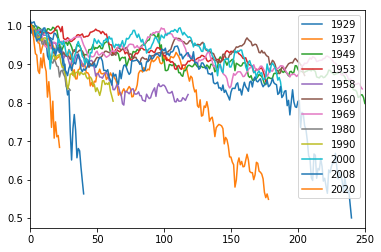

In [4]:
# plotting timeseries        
for i in range(12):
    crash = ret.loc[peak[i]:bottom[i]].reset_index(drop=True)
    crash = crash.rename(recession_list[i])

    (1+crash).cumprod().plot(legend =True)
    
plt.show()


In [5]:



print(
pd.DataFrame(
        {'drawdown(%)':[100*i for i in drops],
         'duration(days)':duration,
         'rebounce(days)': rebounce},
                index=recession_list)
    )

      drawdown(%)  duration(days) rebounce(days)
1929        -45.0              58           9079
1937        -46.0             259           2988
1949        -21.0             363            210
1953        -15.0             252            178
1958        -18.0             171            257
1960        -14.0             294             91
1969        -17.0             363            805
1980        -17.0              43            109
1990        -20.0              87            125
2000        -17.0             271           2352
2008        -50.0             346           1541
2020        -32.0              30              ?
